In [111]:
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
df = pd.read_csv('amostras.csv', sep=',', index_col=0, header=0)

display(df)

,Tempo,Tensão no Resistor 180 ohms,Corrente no Resistor 180 ohms,Tensão na Carga,Corrente na Carga,Corrente Coleta
0,1.702904e+12,2.497556,511.0,2.429130,497.0,2.453568
1,1.702904e+12,2.502444,512.0,2.434018,498.0,2.453568
2,1.702904e+12,2.517107,515.0,2.443793,500.0,2.453568
3,1.702904e+12,2.526882,517.0,2.443793,500.0,2.458456
4,1.702904e+12,2.497556,511.0,2.434018,498.0,2.453568
...,...,...,...,...,...,...
21696,1.702904e+12,2.507331,513.0,2.434018,498.0,2.468231
21697,1.702904e+12,2.492669,510.0,2.443793,500.0,2.478006
21698,1.702904e+12,2.507331,513.0,2.448680,501.0,2.453568
21699,1.702904e+12,2.521994,516.0,2.448680,501.0,2.463343


In [113]:
# removendo as colunas de Corrente no Resistor 180 ohms e Corrente na Carga
df = df.drop(['Corrente no Resistor 180 ohms', 'Corrente na Carga'], axis=1)

In [114]:
# Subtraindo o valor inicial de cada valor de tempo e convertendo para segundos
df['Tempo'] = (df['Tempo'] - df['Tempo'].iloc[0]) / 1000

# Convertendo a parte do tempo para minutos e segundos
df['Minutos'] = df['Tempo'] // 60
df['Segundos'] = df['Tempo'] % 60

In [115]:
display(df)

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
0,0.000000,2.497556,2.429130,2.453568,0.0,0.000000
1,0.071750,2.502444,2.434018,2.453568,0.0,0.071750
2,0.079516,2.517107,2.443793,2.453568,0.0,0.079516
3,0.094500,2.526882,2.443793,2.458456,0.0,0.094500
4,0.106697,2.497556,2.434018,2.453568,0.0,0.106697
...,...,...,...,...,...,...
21696,354.219550,2.507331,2.434018,2.468231,5.0,54.219550
21697,354.235183,2.492669,2.443793,2.478006,5.0,54.235183
21698,354.250816,2.507331,2.448680,2.453568,5.0,54.250816
21699,354.266792,2.521994,2.448680,2.463343,5.0,54.266792


In [116]:
# Selecionamos apenas os 30 primeiros segundos como calda do transiente
amostras = df[df['Tempo'] < 0.3]

display(amostras)

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
0,0.000000,2.497556,2.429130,2.453568,0.0,0.000000
1,0.071750,2.502444,2.434018,2.453568,0.0,0.071750
2,0.079516,2.517107,2.443793,2.453568,0.0,0.079516
3,0.094500,2.526882,2.443793,2.458456,0.0,0.094500
4,0.106697,2.497556,2.434018,2.453568,0.0,0.106697
5,0.122255,2.497556,2.434018,2.448680,0.0,0.122255
6,0.137774,2.502444,2.429130,2.438905,0.0,0.137774
7,0.149090,2.517107,2.434018,2.458456,0.0,0.149090
8,0.157230,2.507331,2.434018,2.468231,0.0,0.157230
9,0.172421,2.517107,2.434018,2.448680,0.0,0.172421


# Primeiro 30 segundos

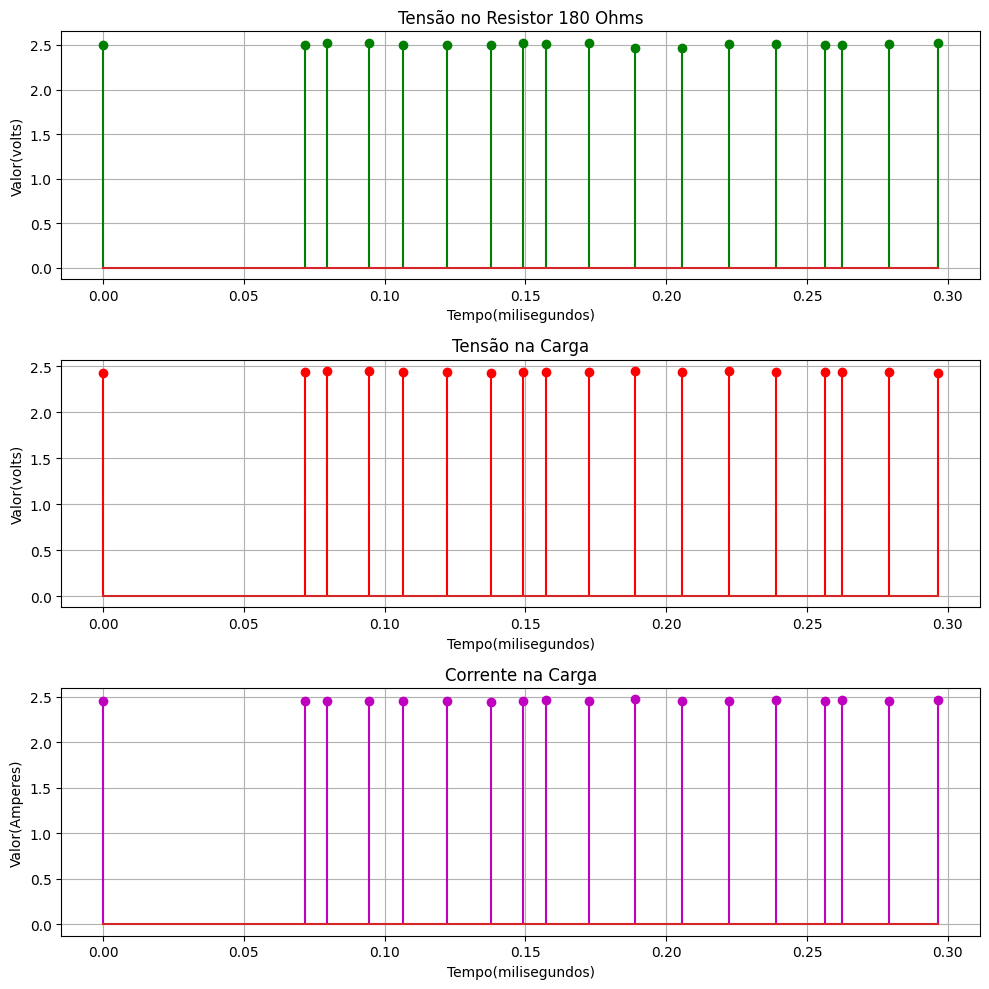

In [117]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# as distorções do sinal

In [118]:
# Selecionamos apenas os 30 primeiros segundos como calda do transiente
amostras = df[(0.6 < df['Tempo']) & (df['Tempo'] < 0.9)]
display(amostras)

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
39,0.609159,2.507331,2.438905,2.463343,0.0,0.609159
40,0.622561,2.512219,2.434018,2.463343,0.0,0.622561
41,0.640160,2.492669,2.438905,2.458456,0.0,0.640160
42,0.648969,2.526882,2.463343,2.463343,0.0,0.648969
43,0.665664,2.517107,2.443793,2.468231,0.0,0.665664
44,0.674913,2.492669,2.434018,2.453568,0.0,0.674913
45,0.692690,2.502444,2.438905,2.458456,0.0,0.692690
46,0.701763,2.497556,2.434018,2.463343,0.0,0.701763
47,0.714696,2.502444,2.438905,2.448680,0.0,0.714696
48,0.731575,2.497556,2.434018,2.463343,0.0,0.731575


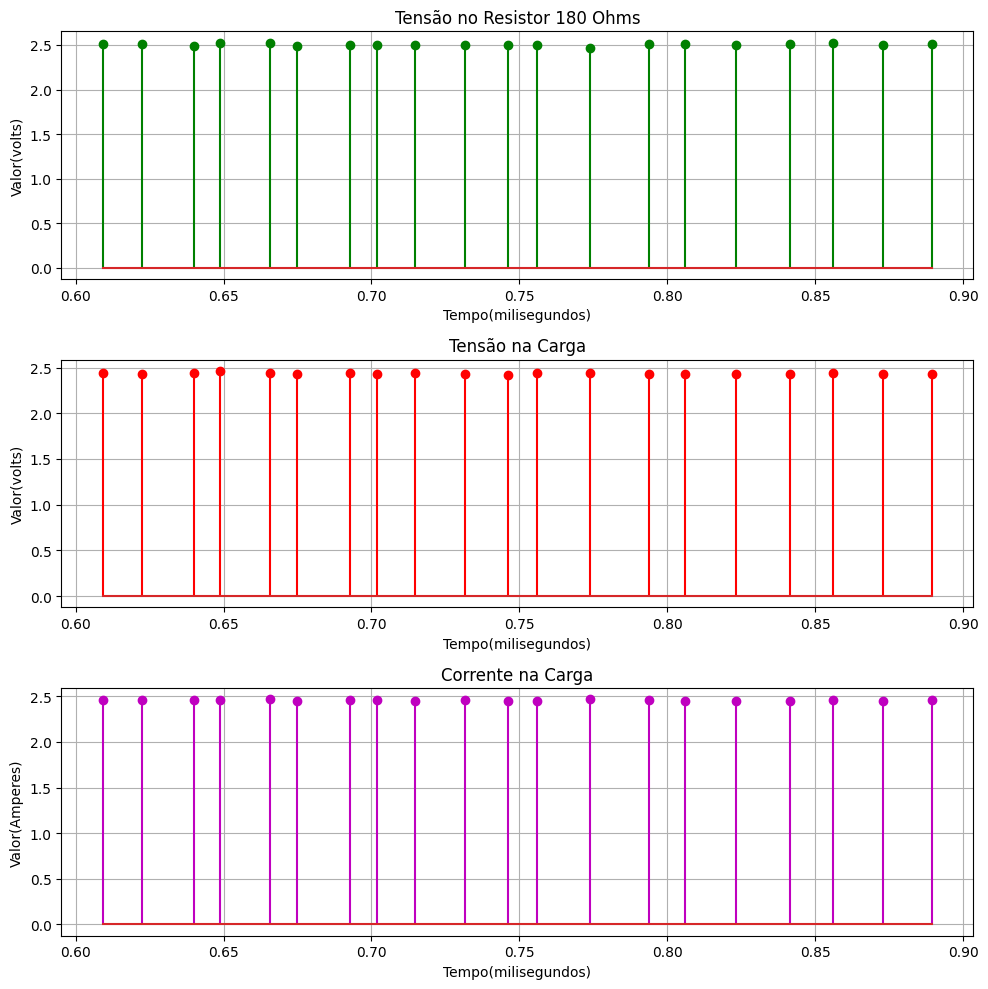

In [119]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Os ultimos 30 segundos

In [120]:
# Selecionamos apenas os 30 ultimos segundos como tail do transiente
amostras = df[df['Tempo'] > 0.5]

display(amostras)

,Tempo,Tensão no Resistor 180 ohms,Tensão na Carga,Corrente Coleta,Minutos,Segundos
31,0.507382,2.502444,2.434018,2.463343,0.0,0.507382
32,0.514575,2.512219,2.434018,2.458456,0.0,0.514575
33,0.521860,2.502444,2.438905,2.453568,0.0,0.521860
34,0.537646,2.517107,2.448680,2.458456,0.0,0.537646
35,0.555759,2.512219,2.419355,2.458456,0.0,0.555759
...,...,...,...,...,...,...
21696,354.219550,2.507331,2.434018,2.468231,5.0,54.219550
21697,354.235183,2.492669,2.443793,2.478006,5.0,54.235183
21698,354.250816,2.507331,2.448680,2.453568,5.0,54.250816
21699,354.266792,2.521994,2.448680,2.463343,5.0,54.266792


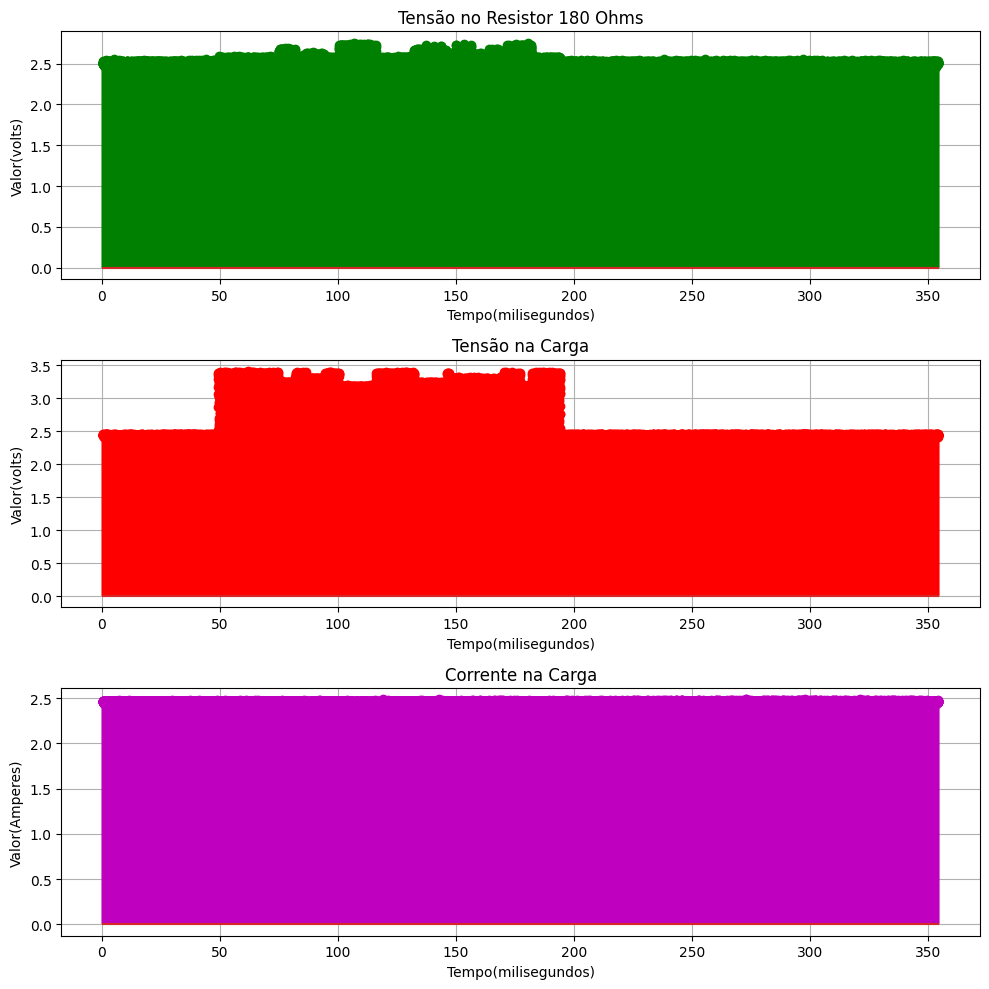

In [121]:
plt.figure(figsize=(10, 10))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(3, 1, 1)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(3, 1, 2)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(amostras['Tempo'], amostras['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(3, 1, 3)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(amostras['Tempo'], amostras['Corrente Coleta'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()
plt.show()